In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.patches import Rectangle
import matplotlib.patheffects as PathEffects

### $Cons_p$

In [2]:
df = pd.read_csv('./cons_p/results2024-11-14_17:48:16.csv')

# Assuming `df` is the loaded DataFrame
# Step 1: Load data and split into two tables by "PPinv" column
dbm_table = df[df["PPinv"] == "DBM (UMAP_NNInv)"]
ssnp_table = df[df["PPinv"] == "SSNP"]

# Step 2: Define a function to pivot and reorganize the table
def reorganize_table(df):
    # Select necessary columns
    df = df[["Data", "Classifier", "$Cons_p$", "$Cons_p$ fast", "diff $Cons_p$"]]
    
    # Melt the table to create a row for each metric ($Cons_p$, $Cons_p$ fast, diff $Cons_p$)
    df_melted = df.melt(id_vars=["Data", "Classifier"], 
                        value_vars=["$Cons_p$", "$Cons_p$ fast", "diff $Cons_p$"],
                        var_name="Metric", value_name="Value")
    
    # Create a multi-index with Classifier and Metric, and pivot with Data as columns
    df_pivot = df_melted.pivot(index=["Classifier", "Metric"], columns="Data", values="Value")
    
    return df_pivot

# Step 3: Apply function to each table
dbm_pivot = reorganize_table(dbm_table)
ssnp_pivot = reorganize_table(ssnp_table)

# Display the results
print("DBM Table:")
print(dbm_pivot)
print("\nSSNP Table:")
print(ssnp_pivot)

DBM Table:
Data                               FashionMNIST       HAR     MNIST
Classifier          Metric                                         
Decision Tree       $Cons_p$           0.403275  0.370377  0.471817
                    $Cons_p$ fast      0.404129  0.365906  0.465134
                    diff $Cons_p$      0.000854 -0.004471 -0.006683
KNN                 $Cons_p$           0.215210  0.081635  0.141373
                    $Cons_p$ fast      0.215927  0.073532  0.136429
                    diff $Cons_p$      0.000717 -0.008102 -0.004944
Logistic Regression $Cons_p$           0.278732  0.177567  0.275864
                    $Cons_p$ fast      0.279205  0.174484  0.272690
                    diff $Cons_p$      0.000473 -0.003082 -0.003174
Neural Network      $Cons_p$           0.295883  0.173950  0.281021
                    $Cons_p$ fast      0.296875  0.171188  0.278549
                    diff $Cons_p$      0.000992 -0.002762 -0.002472
Random Forests      $Cons_p$         

### Search Threshold for new splitting idicator

In [76]:
df = pd.read_csv('./search_threshold/search_t_all.csv')
df.head()

## filter threshold > 0.15
# df = df[df['threshold'] > 0.35]

,Data,PPinv,time near dummy,time near,time grad dummy,time grad,time dist dummy,time dist,threshold,error near abs,error near sq,error grad abs,error grad sq,error dist abs,error dist sq,GRID,num_sparse_near,num_sparse_grad,num_sparse_dist
0,MNIST,DBM(UMAP+NNInv),2.027527,1.507124,0.3558,0.540365,17.067997,7.894634,0.10,0.055375,0.000298,3.255482,0.002875,0.016357,0.001655,256,9857,23450,30161
1,MNIST,DBM(UMAP+NNInv),2.027527,0.244323,0.3558,0.216092,17.067997,3.608205,0.15,0.070034,0.000482,4.045055,0.004270,0.018246,0.002000,256,3987,11628,14494
2,MNIST,DBM(UMAP+NNInv),2.027527,0.133893,0.3558,0.128563,17.067997,2.093779,0.20,0.076960,0.000576,4.614100,0.005620,0.020535,0.002629,256,2214,6600,8089
3,MNIST,DBM(UMAP+NNInv),2.027527,0.136758,0.3558,0.091772,17.067997,1.319795,0.25,0.082536,0.000665,5.132707,0.006916,0.023441,0.003724,256,1557,4250,4961
4,MNIST,DBM(UMAP+NNInv),2.027527,0.122226,0.3558,0.069043,17.067997,0.885823,0.30,0.083679,0.000695,5.435320,0.007894,0.026113,0.005024,256,1342,3005,3190


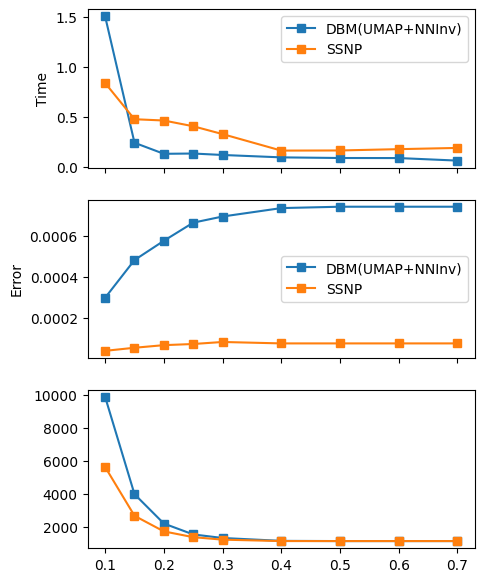

In [18]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(5, 7), sharex=True)

for method in df.PPinv.unique():
    if 'iLAMP' in method:
        continue
    if 't-SNE' in method:
        continue
    if 'RBF' in method:
        continue
    data = df[df.PPinv == method]
    label = method
    ax1.plot(data['threshold'], data['time near'], 's-', label=label)
    ax2.plot(data['threshold'], data['error near sq'], 's-', label=label)
    ax3.plot(data['threshold'], data['num_sparse_near'], 's-', label=label)

# ax1.set_yscale('log')
ax1.legend()
ax1.set_ylabel('Time')
ax2.set_ylabel('Error')
ax2.legend()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


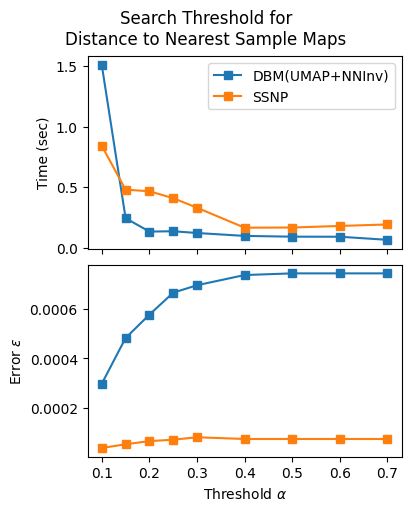

In [33]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(4, 5), sharex=True, constrained_layout=True)

for method in df.PPinv.unique():
    if 'iLAMP' in method:
        continue
    if 't-SNE' in method:
        continue
    if 'RBF' in method:
        continue
    data = df[df.PPinv == method]
    label = method
    ax1.plot(data['threshold'], data['time near'], 's-', label=label)
    ax2.plot(data['threshold'], data['error near sq'], 's-', label=label)
    # ax1.plot(data['threshold'], data['time near dummy'], 's-', label=label)

# ax1.set_yscale('log')
ax1.legend()
ax1.set_ylabel('Time (sec)')
ax2.set_ylabel('Error $\\epsilon$')
ax2.set_xlabel('Threshold $\\alpha$')
fig.suptitle('Search Threshold for\nDistance to Nearest Sample Maps')
fig.savefig('./figures/search_threshold_near.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


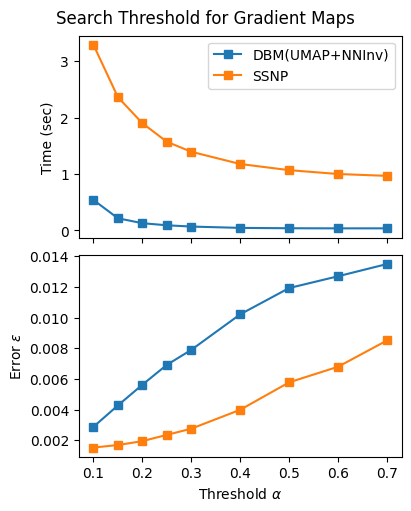

In [34]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(4, 5), sharex=True, constrained_layout=True)

for method in df.PPinv.unique():
    if 'iLAMP' in method:
        continue
    if 't-SNE' in method:
        continue
    if 'RBF' in method:
        continue
    data = df[df.PPinv == method]
    label = method
    ax1.plot(data['threshold'], data['time grad'], 's-', label=label)
    ax2.plot(data['threshold'], data['error grad sq'], 's-', label=label)


# ax1.set_yscale('log')
ax1.legend()
ax1.set_ylabel('Time (sec)')
ax2.set_ylabel('Error $\\epsilon$')
ax2.set_xlabel('Threshold $\\alpha$')
fig.suptitle('Search Threshold for Gradient Maps')
fig.savefig('./figures/search_threshold_grad.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


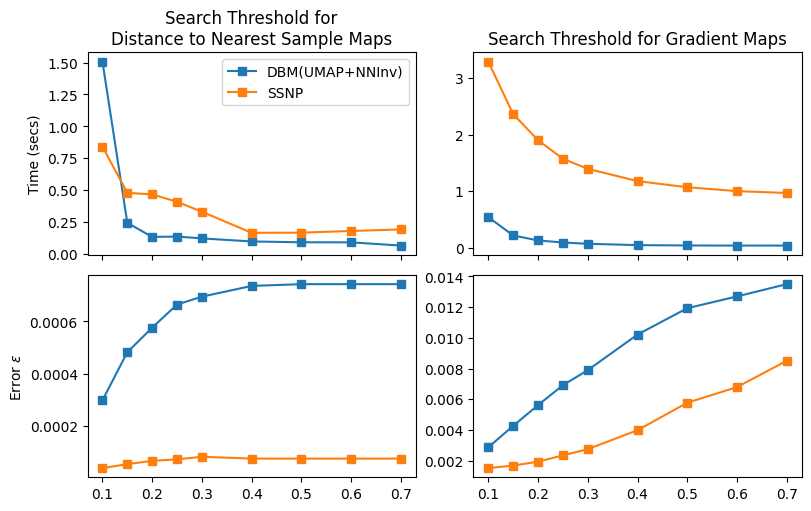

In [84]:
fig, ((ax1, ax3), (ax2, ax4)) = plt.subplots(2, 2, figsize=(8, 5), sharex=True, sharey=False, constrained_layout=True)

for method in df.PPinv.unique():
    if 'iLAMP' in method:
        continue
    if 't-SNE' in method:
        continue
    if 'RBF' in method:
        continue
    data = df[df.PPinv == method]
    label = method
    ax1.plot(data['threshold'], data['time near'], 's-', label=label)
    ax2.plot(data['threshold'], data['error near sq'], 's-', label=label)
    ax3.plot(data['threshold'], data['time grad'], 's-', label=label)
    ax4.plot(data['threshold'], data['error grad sq'], 's-', label=label)

# ax1.set_yscale('log')
ax1.legend()
ax1.set_ylabel('Time (secs)')
ax2.set_ylabel('Error $\\epsilon$')

ax1.set_title('Search Threshold for\nDistance to Nearest Sample Maps')
ax3.set_title('Search Threshold for Gradient Maps')

fig.savefig('./figures/search_threshold.eps')

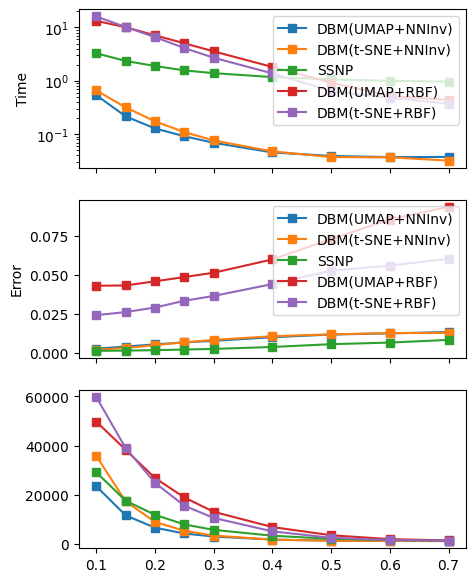

In [8]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(5, 7), sharex=True)

for method in df.PPinv.unique():
    if 'iLAMP' in method:
        continue
    data = df[df.PPinv == method]
    label = method
    ax1.plot(data['threshold'], data['time grad'], 's-', label=label)
    ax2.plot(data['threshold'], data['error grad sq'], 's-', label=label)
    ax3.plot(data['threshold'], data['num_sparse_grad'], 's-', label=label)

ax1.set_yscale('log')
ax1.legend()
ax1.set_ylabel('Time')
ax2.set_ylabel('Error')
ax2.legend()

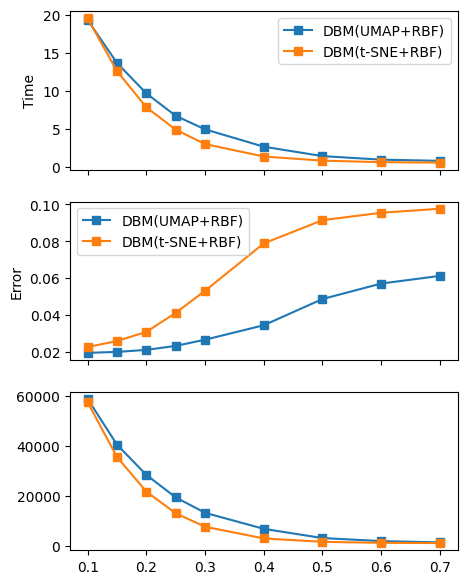

In [51]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(5, 7), sharex=True)

for method in df.PPinv.unique():
    if 'iLAMP' in method:
        continue
    data = df[df.PPinv == method]
    label = method
    ax1.plot(data['threshold'], data['time dist'], 's-', label=label)
    ax2.plot(data['threshold'], data['error dist sq'], 's-', label=label)
    ax3.plot(data['threshold'], data['num_sparse_dist'], 's-', label=label)

ax1.legend()
ax1.set_ylabel('Time')
ax2.set_ylabel('Error')
ax2.legend()

/tmp/ipykernel_6247/3204918518.py:20: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "s-" (-> linestyle='-'). The keyword argument will take precedence.
  ax1.plot(data['GRID'], data['time near dummy'], 's-', label=method.split('(')[0]+ ' ground truth', linestyle='--')
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


DBM(UMAP+NNInv)
SSNP


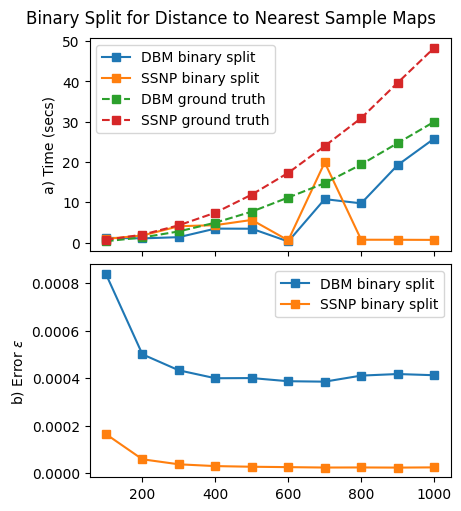

In [56]:
df = pd.read_csv('./search_threshold/new_varygrid_near_t015_2024-12-02_13:22:23.csv')
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(4.5, 5), sharex=True, constrained_layout=True)

for method in df.PPinv.unique():
    if 'SNE' in method:
        continue
    for t in df.threshold.unique():
        data = df[(df.PPinv == method) & (df.threshold == t)]
        label = method.split('(')[0] + ' binary split'
        ax1.plot(data['GRID'], data['time near'], 's-', label=label)
        ax2.plot(data['GRID'], data['error near sq'], 's-', label=label)
        # ax3.plot(data['GRID'], data['num_sparse_near'], 's-', label=label)
        # if 'iLAMP' in method:
    #     continue
for method in df.PPinv.unique():
    if 'SNE' in method:
        continue
    print(method)
    data = df[(df.PPinv == method)]
    ax1.plot(data['GRID'], data['time near dummy'], 's-', label=method.split('(')[0]+ ' ground truth', linestyle='--')  

ax1.legend()
ax1.set_ylabel('a) Time (secs)')
ax2.set_ylabel('b) Error $\\epsilon$')
ax2.legend()
fig.suptitle('Binary Split for Distance to Nearest Sample Maps')
fig.savefig('./figures/near_map_vary_grid.eps')

/tmp/ipykernel_6247/3943079216.py:18: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "s-" (-> linestyle='-'). The keyword argument will take precedence.
  ax3.plot(data['GRID'], data['time grad dummy'], 's-', label=method.split('(')[0]+ ' ground truth', linestyle='--')
/tmp/ipykernel_6247/3943079216.py:43: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "s-" (-> linestyle='-'). The keyword argument will take precedence.
  ax1.plot(data['GRID'], data['time near dummy'], 's-', label=method.split('(')[0]+ ' ground truth', linestyle='--')
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


DBM(UMAP+NNInv)
SSNP
DBM(UMAP+NNInv)
SSNP


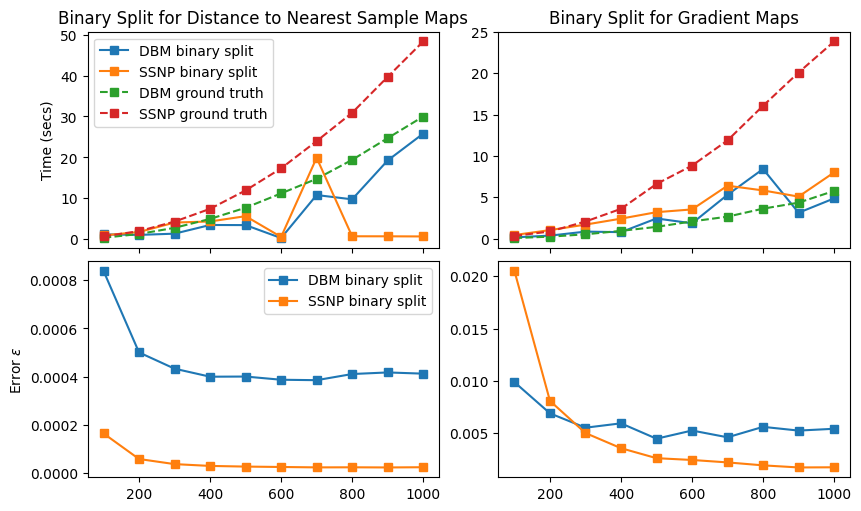

In [85]:
df = pd.read_csv('./search_threshold/new_varygrid_grad_t015_2024-11-29_22:19:59.csv')
fig, ((ax1, ax3), (ax2, ax4)) = plt.subplots(2, 2, figsize=(8.5, 5), sharex=True, constrained_layout=True)

for method in df.PPinv.unique():
    if 'SNE' in method:
        continue
    for t in df.threshold.unique():
        data = df[(df.PPinv == method) & (df.threshold == t)]
        label = method.split('(')[0] + ' binary split'
        ax3.plot(data['GRID'], data['time grad_reduced'], 's-', label=label)
        ax4.plot(data['GRID'], data['error grad reduced sq'], 's-', label=label)

for method in df.PPinv.unique():
    if 'SNE' in method:
        continue
    print(method)
    data = df[(df.PPinv == method)]
    ax3.plot(data['GRID'], data['time grad dummy'], 's-', label=method.split('(')[0]+ ' ground truth', linestyle='--')  


# fig.suptitle('Binary Split for Gradient Maps')
# fig.savefig('./figures/grad_map_vary_grid.eps')

df = pd.read_csv('./search_threshold/new_varygrid_near_t015_2024-12-02_13:22:23.csv')
# fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(4.5, 5), sharex=True, constrained_layout=True)

for method in df.PPinv.unique():
    if 'SNE' in method:
        continue
    for t in df.threshold.unique():
        data = df[(df.PPinv == method) & (df.threshold == t)]
        label = method.split('(')[0] + ' binary split'
        ax1.plot(data['GRID'], data['time near'], 's-', label=label)
        ax2.plot(data['GRID'], data['error near sq'], 's-', label=label)
        # ax3.plot(data['GRID'], data['num_sparse_near'], 's-', label=label)
        # if 'iLAMP' in method:
    #     continue
for method in df.PPinv.unique():
    if 'SNE' in method:
        continue
    print(method)
    data = df[(df.PPinv == method)]
    ax1.plot(data['GRID'], data['time near dummy'], 's-', label=method.split('(')[0]+ ' ground truth', linestyle='--')  

ax1.legend()
ax1.set_ylabel('Time (secs)')
ax2.set_ylabel('Error $\\epsilon$')
ax2.legend()

ax3.set_title('Binary Split for Gradient Maps')
ax1.set_title('Binary Split for Distance to Nearest Sample Maps')

fig.savefig('./figures/binary_split_general_vary_grid.eps')


/tmp/ipykernel_6247/1460776489.py:10: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "s-" (-> linestyle='-'). The keyword argument will take precedence.
  ax1.plot(data['GRID'], data['time grad_reduced'], 's-', label=label+' reduced', linestyle='--')
/tmp/ipykernel_6247/1460776489.py:12: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "s-" (-> linestyle='-'). The keyword argument will take precedence.
  ax2.plot(data['GRID'], data['error grad reduced sq'], 's-', label=label+ ' reduced', linestyle='--')
/tmp/ipykernel_6247/1460776489.py:14: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "s-" (-> linestyle='-'). The keyword argument will take precedence.
  ax3.plot(data['GRID'], data['num_sparse_grad_reduced'], 's-', label=label+ 'reduced', linestyle='--')


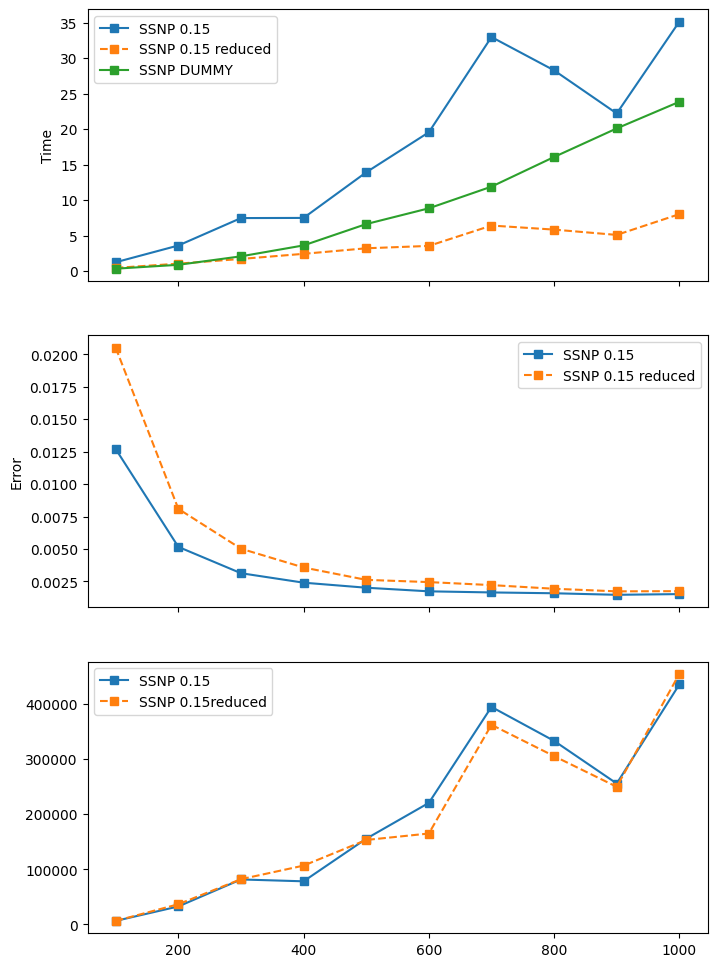

In [59]:

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 12), sharex=True)

for method in df.PPinv.unique():
    if 'SSNP' not in method:
        continue
    for t in df.threshold.unique():
        data = df[(df.PPinv == method) & (df.threshold == t)]
        label = method + ' ' + str(t)
        ax1.plot(data['GRID'], data['time grad'], 's-', label=label)
        ax1.plot(data['GRID'], data['time grad_reduced'], 's-', label=label+' reduced', linestyle='--')
        ax2.plot(data['GRID'], data['error grad sq'], 's-', label=label)
        ax2.plot(data['GRID'], data['error grad reduced sq'], 's-', label=label+ ' reduced', linestyle='--')
        ax3.plot(data['GRID'], data['num_sparse_grad'], 's-', label=label)
        ax3.plot(data['GRID'], data['num_sparse_grad_reduced'], 's-', label=label+ 'reduced', linestyle='--')


    ax1.plot(data['GRID'], data['time grad dummy'], 's-', label=method + ' DUMMY')
ax1.legend()
ax1.set_ylabel('Time')
ax2.set_ylabel('Error')
ax2.legend()
ax3.legend()




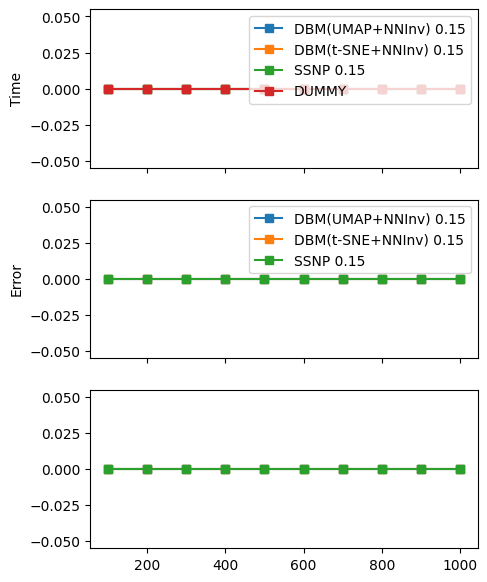

In [54]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(5, 7), sharex=True)

for method in df.PPinv.unique():
    # if 'iLAMP' in method:
    #     continue
    for t in df.threshold.unique():
        data = df[(df.PPinv == method) & (df.threshold == t)]
        label = method + ' ' + str(t)
        ax1.plot(data['GRID'], data['time dist'], 's-', label=label)
        ax2.plot(data['GRID'], data['error dist sq'], 's-', label=label)
        ax3.plot(data['GRID'], data['num_sparse_dist'], 's-', label=label)

ax1.plot(data['GRID'], data['time near dummy'], 's-', label='DUMMY')
ax1.legend()
ax1.set_ylabel('Time')
ax2.set_ylabel('Error')
ax2.legend()

In [55]:
def plot_split(ax, sparse, grid=None, plot_center=False):
    threshold = 1
    ax.scatter(sparse[:, 0].min(), sparse[:, 1].min(), s=100, c='w')
    ax.scatter(sparse[:, 0].max(), sparse[:, 1].max(), s=100, c='w')
    for item in sparse:
        if item[-2] > threshold and item[-1] > threshold:
            w, h = item[-2], item[-1]
            ax.add_patch(Rectangle((item[0]-w/2, item[1]-h/2), w, h, fill=None, edgecolor='r', lw=0.1))
            if plot_center:
                ax.scatter(item[0], item[1], c='g', s=1, marker='s')
            # ax[2].scatter(item[0], item[1], c=item[3], s=1, marker='.', k='w')
            # ax.set_xlim(0, GRID)
            # ax.set_ylim(0, GRID)
        # else:
        #     ax[2].scatter(item[0], item[1], c=item[3], s=1, marker='s')
    if grid is not None:
        ax.set(xlim=(-1, grid), ylim=(-1, grid))
    # ax[2].set(xlim=(0-5, GRID+1), ylim=(0-5, GRID+1))

    return ax

def plot_dist_map(data_names, ppinv_name, n_cols=3, dir='dist2boundary', suffix='general_03'):
    n_rows = len(data_names)
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(2.5*n_cols, 2.5*n_rows+0.1), constrained_layout=False)
    fig.subplots_adjust(hspace=0.02, wspace=0.02)
    for i, data_name in enumerate(data_names):
        data = np.load(f'{dir}/{data_name}_{ppinv_name}_dist2boundary_{suffix}.npz')
        gt = data['dist_gt']
        time_gt = data['time_gt']
        fast = data['dist_fast']
        time_fast = data['time_fast']
        diff = fast - gt
        sparse = data['sparse']
        axs[i, 0].imshow(gt, cmap='viridis', extent=[0, 1, 0, 1])
        axs[i, 0].set_ylabel(data_name, fontsize=12)
        if i == 0:
            axs[i, 0].set_title('Ground Truth')
            axs[i, 1].set_title('Binary Split')
            axs[i, 2].set_title('Binary Split Process')
        txt = axs[i, 0].text(0.05, 0.05, f'{time_gt:.2f} s', color='white', fontsize=14)
        txt.set_path_effects([PathEffects.withStroke(linewidth=3, foreground='k')])
        axs[i, 1].imshow(fast, cmap='viridis', extent=[0, 1, 0, 1])
        
        
        txt = axs[i, 1].text(0.05, 0.05, f'{time_fast:.2f} s', color='white', fontsize=14)
        txt.set_path_effects([PathEffects.withStroke(linewidth=3, foreground='k')])
        # axs[i, 2].imshow(diff, cmap='bwr', extent=[0, 1, 0, 1])
        # axs[i, 2].set_title('Diff')
        # axs[i, 3].scatter(sparse[:, 0], sparse[:, 1], s=1)
        plot_split(axs[i, 2], sparse, grid=data['grid'], plot_center=False)

    for ax in axs.flatten():
        ax.set_yticks([])
        ax.set_xticks([])
        ax.set_aspect('equal')
        
    return fig

In [10]:
df = pd.read_csv('./dist2boundary/results_general_2024-11-26_09:41:48.csv')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: './dist2boundary/results_general_2024-11-26_09:41:48.csv'

Text(0, 0.5, 'errors $\\epsilon$')

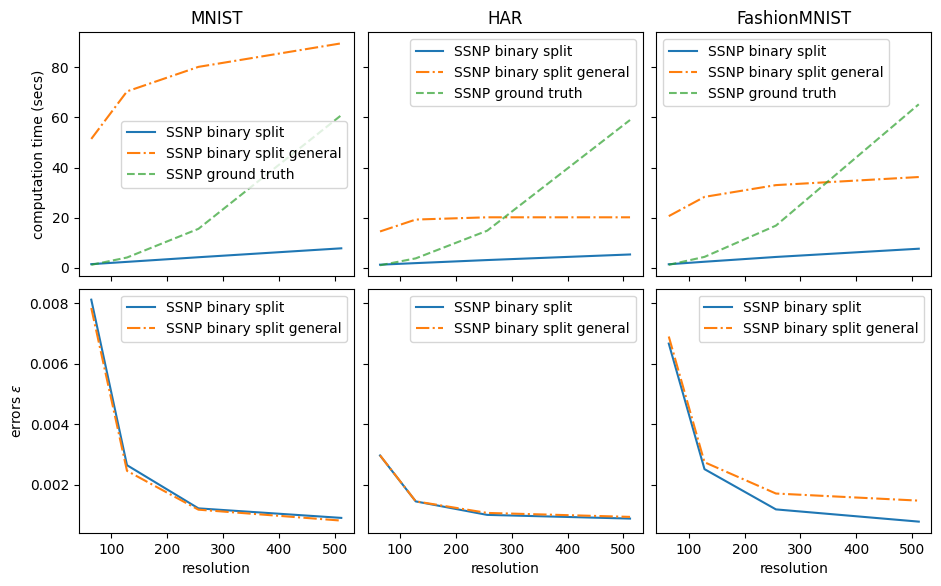

In [16]:
### plot with seaborn

# fig, axes = plt.subplots(2, 3, figsize=(9, 5.5), sharex=True, sharey='row')
fig, axes = plt.subplots(2, 3, figsize=(11, 6.5), sharex=True, sharey='row')
fig.subplots_adjust(hspace=0.05, wspace=0.05)
for i, data_name in enumerate(df.Data.unique()):
    data = df[df.Data == data_name]
    for pinv in data.PPinv.unique():
        if pinv != 'SSNP':
            continue
        d = data[data.PPinv == pinv]
        axes[0, i].plot(d.grid, d['time fast'], '-', label=pinv[:4] + ' binary split')
        axes[0, i].plot(d.grid, d['time fast general'], '-.', label=pinv[:4] + ' binary split general')

        axes[0, i].plot(d.grid, d['time dummy'], '--', label=pinv[:4] + ' ground truth', alpha=0.7)
        


        axes[1, i].plot(d.grid, d['error_sq'], '-', label=pinv[:4] + ' binary split', alpha=1)
        axes[1, i].plot(d.grid, d['error_sq_general'], '-.', label=pinv[:4] + ' binary split general', alpha=1)
        
    axes[0, i].legend()
    axes[0, i].set_title(data_name)
    axes[1, i].legend()
    axes[1, i].set_xlabel('resolution')

axes[0, 0].set_ylabel('computation time (secs)')
axes[1, 0].set_ylabel('errors $\epsilon$')

# fig.savefig('../figures/time_deepfool.eps', format='eps', bbox_inches='tight', dpi=150)

In [10]:
dataset_names = [
    'HAR',
    "MNIST",
    "FashionMNIST",
]

PPinv_names = [
    "DBM(UMAP+NNInv)",
    "DBM(t-SNE+NNInv)",
    'SSNP'
]

In [11]:
# plot_dist_map(dataset_names, PPinv_names[0])

FileNotFoundError: [Errno 2] No such file or directory: 'dist2boundary/HAR_DBM(UMAP+NNInv)_dist2boundary_general_03.npz'

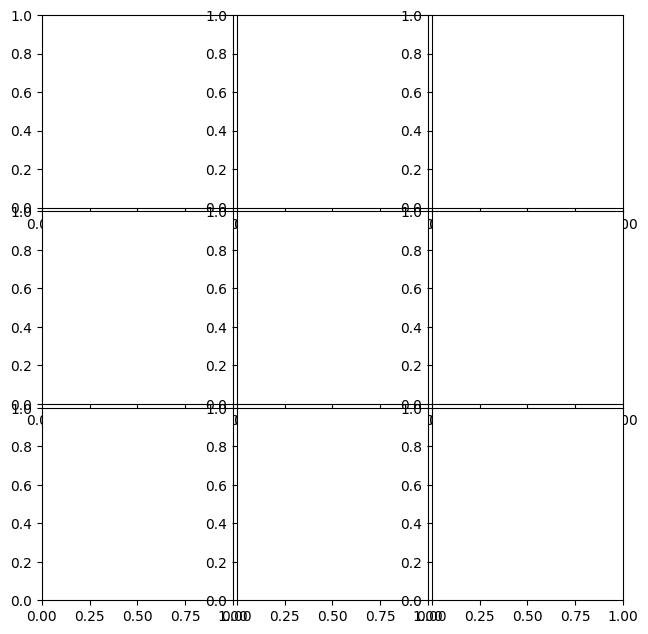

In [14]:
for ppinv_name in PPinv_names:
    fig = plot_dist_map(dataset_names, ppinv_name, suffix='general_03')
    fig.savefig(f'figures/dist2boundary_{ppinv_name}_general.png'.replace(' ', ''), format='pdf', bbox_inches='tight')